# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
Default=pd.read_csv(r'C:\Users\Law kumar\Downloads\Default.csv')

In [3]:
Default.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


In [4]:
Default.shape

(10000, 4)

In [5]:
Default.isnull().values.any()

False

In [6]:
Default.select_dtypes(include=['object']).columns

Index(['default', 'student'], dtype='object')

In [7]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


# Data Visualization


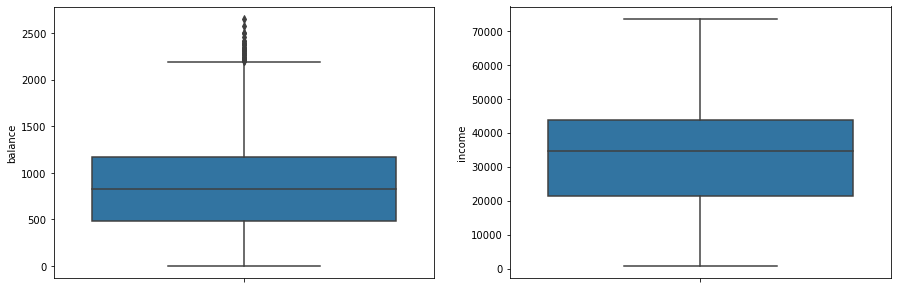

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(y=Default['income'])
plt.show()


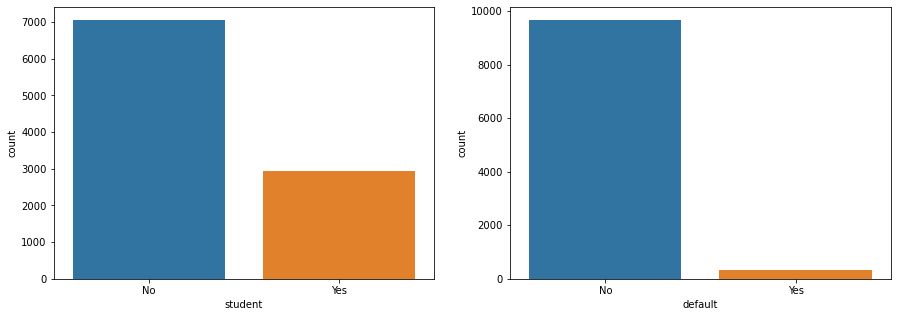

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(Default['student'])

plt.subplot(1,2,2)
sns.countplot(Default['default'])
plt.show()


In [10]:
Default['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [11]:
Default['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [12]:
Default['student'].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [13]:
Default['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

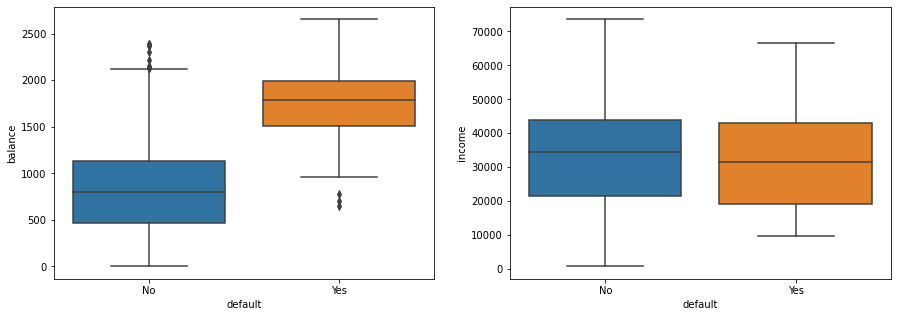

In [14]:
 plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(Default['default'],Default['balance'],)

plt.subplot(1,2,2)
sns.boxplot(Default['default'],Default['income'])
plt.show()


# Correlation

In [15]:
corr=Default.corr()
corr

,balance,income
balance,1.000000,-0.152243
income,-0.152243,1.000000


<AxesSubplot:>

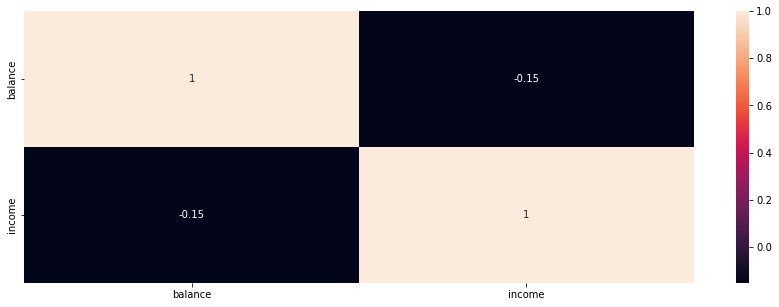

In [16]:
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot=True)

In [17]:
Q1,Q3=Default['balance'].quantile([0.25,0.75])
IQR=Q3-Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
UL

2193.16375

In [18]:
df=Default[Default['balance']>UL]
df.head()

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23


In [19]:
df['default'].count()

31

In [20]:
df['default'].value_counts(normalize = True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [21]:
df['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [22]:
Default['balance'] = np.where(Default['balance'] > UL, UL, Default['balance'] )

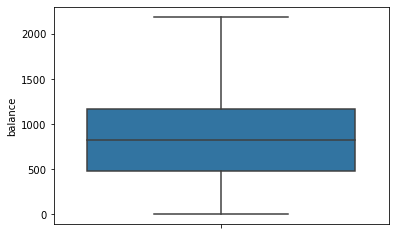

In [23]:
sns.boxplot(y = Default['balance'])
plt.show()

# Dealing with categorical values

In [24]:
Default = pd.get_dummies(Default, drop_first = True)

In [25]:
Default.head()

,balance,income,default_Yes,student_Yes
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0


# Train test split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = Default.drop('default_Yes', axis = 1)
Y = Default['default_Yes']

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [29]:
X_train.shape

(7000, 3)

In [30]:
Y_train.shape

(7000,)

In [31]:
X_test.shape

(3000, 3)

In [32]:
Y_test.shape

(3000,)

# Feature Scaling


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler= StandardScaler()

In [35]:
X_train=scaler.fit_transform(X_train)

In [36]:
X_test=scaler.fit_transform(X_test)

In [37]:
X_train

array([[-0.47014804,  0.21687103, -0.6417629 ],
       [-1.0423052 , -0.31625018, -0.6417629 ],
       [-0.94476086,  0.41064179, -0.6417629 ],
       ...,
       [-0.30361502, -1.47019889,  1.55820787],
       [-1.64174473, -1.47842568,  1.55820787],
       [-1.03312063,  1.39814409, -0.6417629 ]])

In [38]:
X_test

array([[-1.71605077, -1.44453604,  1.52510405],
       [-0.90558714,  1.64870465, -0.65569297],
       [ 0.4202382 ,  1.0637354 , -0.65569297],
       ...,
       [ 1.60530062, -1.60902663,  1.52510405],
       [-1.71605077, -0.33711358, -0.65569297],
       [-0.82070067, -1.18187127,  1.52510405]])

# Model application

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
Classifier_lr=LogisticRegression(random_state=0)

In [41]:
Classifier_lr.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [42]:
Y_predict=Classifier_lr.predict(X_test)

In [43]:
Y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

# Evaluation of performance

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
confusion_matrix(Y_test,Y_predict)

array([[2880,    7],
       [  78,   35]], dtype=int64)

In [46]:
classification_report(Y_test,Y_predict)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99      2887\n           1       0.83      0.31      0.45       113\n\n    accuracy                           0.97      3000\n   macro avg       0.90      0.65      0.72      3000\nweighted avg       0.97      0.97      0.97      3000\n'

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
Accuracies=cross_val_score(estimator=Classifier_lr,X=X_train,y=Y_train,cv=10)

In [49]:
np.mean(Accuracies)

0.9737142857142856

# Hyperparameter tunning


In [50]:
from sklearn.model_selection import RandomizedSearchCV




In [51]:
parameters={'penalty':['l1','l2','elasticnet','none'],
            'C':[0.25,0.5,0.75,1.0,1.25,1.50,1.75,2.0],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [52]:
random_search=RandomizedSearchCV(estimator=Classifier_lr,param_distributions=parameters,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

In [53]:
random_search.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [54]:
random_search.best_estimator_

LogisticRegression(C=0.5, penalty='l1', random_state=0, solver='liblinear')

In [55]:
random_search.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.5}

In [56]:
random_search.best_score_

0.9516894609814963

In [58]:
from sklearn.linear_model import LogisticRegression
Classifier_lr=LogisticRegression(random_state=0,solver= 'liblinear', penalty= 'l1', C= 0.5)
Classifier_lr.fit(X_train,Y_train)

LogisticRegression(C=0.5, penalty='l1', random_state=0, solver='liblinear')

In [59]:
Y_predict=Classifier_lr.predict(X_test)

In [60]:
classification_report(Y_test,Y_predict)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99      2887\n           1       0.85      0.31      0.45       113\n\n    accuracy                           0.97      3000\n   macro avg       0.91      0.65      0.72      3000\nweighted avg       0.97      0.97      0.97      3000\n'

In [61]:
Accuracies=cross_val_score(Classifier_lr,X_train,Y_train,cv=10)

In [62]:
np.mean(Accuracies)

0.9737142857142856